In [1]:
#import libraries 
import pandas as pd 
from sklearn import model_selection, naive_bayes, svm
from nltk.corpus import stopwords
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from collections import Counter
import numpy as np
from nltk.stem import PorterStemmer
from decimal import Decimal
import re 
from sklearn.feature_extraction.text import CountVectorizer

# Data set

In [26]:
#read dataset 
file_path = 'final_all_train_level_1.csv'
#file_path = 'static_data_preprocessed_tracking.csv'

data_set = pd.read_csv(file_path)
data_set.head()
#data_set['label_class'].unique()
#data_set['idiom'].unique()


,message,custom,label_class,idiom,sentences_clean
0,A delivery change for this package is in progr...,No,transit,English,delivery change for this package is in progres...
1,A delivery change for this package is in progr...,No,exception,English,delivery change for this package is in progres...
2,A delivery change for this package is in progr...,No,transit,English,delivery change for this package is in progres...
3,A delivery change for this package is in progr...,No,transit,English,delivery change for this package is in progres...
4,A flight cancelation has delayed delivery. We'...,No,exception,English,flight cancelation has delayed delivery. We ar...


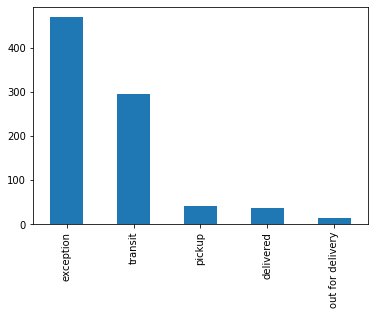

In [27]:
data_set['label_class'].value_counts().plot(kind ='bar')

# Text pre processing

In [28]:
# Remove stopwordsa and sepecial characters and lower
#stop = stopwords.words('english')
#data_set['message_pre_processed'] = data_set['message'].apply(lambda x: ' '.join([word for word in re.sub(r'[^\w]', ' ', x).lower().split() if word not in (stop) and not word.isdigit()]))
#data_set.head()

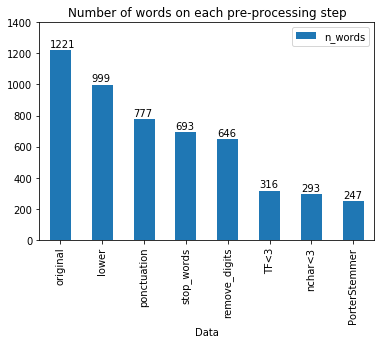

In [29]:
# REMOVE CASE, PONTUCTATION, STOPWORDS, DIGITS, TF< 3, N_char < 3,  PORTER STEEMER

n_words = []

words = set()
data_set['message'].str.split().apply(words.update)
n_words.append(['original', len(words)])

data_set['message_pre_processed_1'] = data_set['message'].apply(lambda x: ' '.join([word for word in x.lower().split()]))
words = set()
data_set['message_pre_processed_1'].str.split().apply(words.update)
n_words.append(['lower', len(words)])

data_set['message_pre_processed_2'] = data_set['message_pre_processed_1'].apply(lambda x: ' '.join([word for word in re.sub(r'[^\w]', ' ', x).split()]))
words = set()
data_set['message_pre_processed_2'].str.split().apply(words.update)
n_words.append(['ponctuation', len(words)])

stop = stopwords.words('english')
data_set['message_pre_processed_3'] = data_set['message_pre_processed_2'].apply(lambda x: ' '.join([word for word in  x.split() if word not in stop ]))
words = set()
data_set['message_pre_processed_3'].str.split().apply(words.update)
n_words.append(['stop_words', len(words)])

data_set['message_pre_processed_4'] = data_set['message_pre_processed_3'].apply(lambda x: ' '.join([word for word in x.split() if not word.isdigit()]))
words = set()
data_set['message_pre_processed_4'].str.split().apply(words.update)
n_words.append(['remove_digits', len(words)])

min_freq=3
TF_words = pd.Series(np.concatenate([x.split() for x in data_set['message_pre_processed_4'] ])).value_counts()
data_set['message_pre_processed_5'] = data_set['message_pre_processed_4'].apply(lambda x: ' '.join([word for word in x.split() if  word not in list(TF_words[TF_words < min_freq].index)]))
words = set()
data_set['message_pre_processed_5'].str.split().apply(words.update)
n_words.append(['TF<'+ str(min_freq), len(words)])

min_char = 3
data_set['message_pre_processed_6'] = data_set['message_pre_processed_5'].apply(lambda x: ' '.join([word for word in x.split() if  len(word)> min_char ]))
words = set()
data_set['message_pre_processed_6'].str.split().apply(words.update)
n_words.append(['nchar<'+ str(min_char), len(words)])

ps = PorterStemmer()
data_set['message_pre_processed_7'] = data_set['message_pre_processed_6'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
words = set()
data_set['message_pre_processed_7'].str.split().apply(words.update)
n_words.append(['PorterStemmer', len(words)])

n_words_df = pd.DataFrame( n_words, columns=['Data','n_words']) 



plt = n_words_df.plot.bar(x='Data', y='n_words', rot=0, color = 'tab:blue', title= 'Number of words on each pre-processing step', ylim= (0,1400))
plt.set_xticklabels(n_words_df['Data'], rotation=90)

for p in plt.patches:
    plt.annotate(str(p.get_height()), (p.get_x(), p.get_height()+ 20))
    

In [30]:
n_words_df

,Data,n_words
0,original,1221
1,lower,999
2,ponctuation,777
3,stop_words,693
4,remove_digits,646
5,TF<3,316
6,nchar<3,293
7,PorterStemmer,247


In [283]:
data_set.shape

data_set.head()

,message,custom,label_class,idiom,sentences_clean,message_pre_processed_1,message_pre_processed_2,message_pre_processed_3,message_pre_processed_4,message_pre_processed_5,message_pre_processed_6,message_pre_processed_7
0,A delivery change for this package is in progr...,No,transit,English,delivery change for this package is in progres...,a delivery change for this package is in progr...,a delivery change for this package is in progr...,delivery change package progress delivery ups ...,delivery change package progress delivery ups ...,delivery change package progress delivery ups ...,delivery change package progress delivery acce...,deliveri chang packag progress deliveri access...
1,A delivery change for this package is in progr...,No,exception,English,delivery change for this package is in progres...,a delivery change for this package is in progr...,a delivery change for this package is in progr...,delivery change package progress package retur...,delivery change package progress package retur...,delivery change package progress package retur...,delivery change package progress package retur...,deliveri chang packag progress packag return s...
2,A delivery change for this package is in progr...,No,transit,English,delivery change for this package is in progres...,a delivery change for this package is in progr...,a delivery change for this package is in progr...,delivery change package progress 39 reschedule...,delivery change package progress rescheduled d...,delivery change package progress rescheduled d...,delivery change package progress rescheduled d...,deliveri chang packag progress reschedul deliveri
3,A delivery change for this package is in progr...,No,transit,English,delivery change for this package is in progres...,a delivery change for this package is in progr...,a delivery change for this package is in progr...,delivery change package progress package deliv...,delivery change package progress package deliv...,delivery change package progress package deliv...,delivery change package progress package deliv...,deliveri chang packag progress packag deliv al...
4,A flight cancelation has delayed delivery. We'...,No,exception,English,flight cancelation has delayed delivery. We ar...,a flight cancelation has delayed delivery. we'...,a flight cancelation has delayed delivery we r...,flight cancelation delayed delivery updating p...,flight cancelation delayed delivery updating p...,flight delayed delivery plans deliver package ...,flight delayed delivery plans deliver package ...,flight delay deliveri plan deliv packag quickl...


## Split train test

In [273]:
Train_X_0, Test_X_0, Train_Y_0, Test_Y_0 = model_selection.train_test_split(data_set['message'],data_set['label_class'],test_size=0.3)
Train_X_1, Test_X_1, Train_Y_1, Test_Y_1 = model_selection.train_test_split(data_set['message_pre_processed_1'],data_set['label_class'],test_size=0.3)
Train_X_2, Test_X_2, Train_Y_2, Test_Y_2 = model_selection.train_test_split(data_set['message_pre_processed_2'],data_set['label_class'],test_size=0.3)
Train_X_3, Test_X_3, Train_Y_3, Test_Y_3 = model_selection.train_test_split(data_set['message_pre_processed_3'],data_set['label_class'],test_size=0.3)
Train_X_4, Test_X_4, Train_Y_4, Test_Y_4 = model_selection.train_test_split(data_set['message_pre_processed_4'],data_set['label_class'],test_size=0.3)
Train_X_5, Test_X_5, Train_Y_5, Test_Y_5 = model_selection.train_test_split(data_set['message_pre_processed_5'],data_set['label_class'],test_size=0.3)
Train_X_6, Test_X_6, Train_Y_6, Test_Y_6 = model_selection.train_test_split(data_set['message_pre_processed_6'],data_set['label_class'],test_size=0.3)
Train_X_7, Test_X_7, Train_Y_7, Test_Y_7 = model_selection.train_test_split(data_set['message_pre_processed_7'],data_set['label_class'],test_size=0.3)


Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(data_set['message_pre_processed_7'],data_set['label_class'],test_size=0.3)


Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

# Text vectorization

## One hot encoding 

In [193]:
vectorizer = CountVectorizer()

X_ohe_0 = vectorizer.fit_transform(data_set['message'])
X_ohe_1 = vectorizer.fit_transform(data_set['message_pre_processed_1'])
X_ohe_2 = vectorizer.fit_transform(data_set['message_pre_processed_2'])
X_ohe_3 = vectorizer.fit_transform(data_set['message_pre_processed_3'])
X_ohe_4 = vectorizer.fit_transform(data_set['message_pre_processed_4'])
X_ohe_5 = vectorizer.fit_transform(data_set['message_pre_processed_5'])
X_ohe_6 = vectorizer.fit_transform(data_set['message_pre_processed_6'])
X_ohe_7 = vectorizer.fit_transform(data_set['message_pre_processed_7'])

Train_X_ohe_0, Test_X_ohe_0, Train_Y_ohe_0, Test_Y_ohe_0 = model_selection.train_test_split(X_ohe_1,data_set['label_class'], test_size=0.3)
Train_X_ohe_1, Test_X_ohe_1, Train_Y_ohe_1, Test_Y_ohe_1 = model_selection.train_test_split(X_ohe_1,data_set['label_class'], test_size=0.3)
Train_X_ohe_2, Test_X_ohe_2, Train_Y_ohe_2, Test_Y_ohe_2 = model_selection.train_test_split(X_ohe_2,data_set['label_class'], test_size=0.3)
Train_X_ohe_3, Test_X_ohe_3, Train_Y_ohe_3, Test_Y_ohe_3 = model_selection.train_test_split(X_ohe_3,data_set['label_class'], test_size=0.3)
Train_X_ohe_4, Test_X_ohe_4, Train_Y_ohe_4, Test_Y_ohe_4 = model_selection.train_test_split(X_ohe_4,data_set['label_class'], test_size=0.3)
Train_X_ohe_5, Test_X_ohe_5, Train_Y_ohe_5, Test_Y_ohe_5 = model_selection.train_test_split(X_ohe_5,data_set['label_class'], test_size=0.3)
Train_X_ohe_6, Test_X_ohe_6, Train_Y_ohe_6, Test_Y_ohe_6 = model_selection.train_test_split(X_ohe_6,data_set['label_class'], test_size=0.3)
Train_X_ohe_7, Test_X_ohe_7, Train_Y_ohe_7, Test_Y_ohe_7 = model_selection.train_test_split(X_ohe_7,data_set['label_class'], test_size=0.3)

## TF-IDF

In [210]:
Tfidf_vect_0 = TfidfVectorizer(max_features=5000)
Tfidf_vect_1 = TfidfVectorizer(max_features=5000)
Tfidf_vect_2 = TfidfVectorizer(max_features=5000)
Tfidf_vect_3 = TfidfVectorizer(max_features=5000)
Tfidf_vect_4 = TfidfVectorizer(max_features=5000)
Tfidf_vect_5 = TfidfVectorizer(max_features=5000)
Tfidf_vect_6 = TfidfVectorizer(max_features=5000)
Tfidf_vect_7 = TfidfVectorizer(max_features=5000)



Tfidf_vect_0.fit(data_set['message'])
Tfidf_vect_1.fit(data_set['message_pre_processed_1'])
Tfidf_vect_2.fit(data_set['message_pre_processed_2'])
Tfidf_vect_3.fit(data_set['message_pre_processed_3'])
Tfidf_vect_4.fit(data_set['message_pre_processed_4'])
Tfidf_vect_5.fit(data_set['message_pre_processed_5'])
Tfidf_vect_6.fit(data_set['message_pre_processed_6'])
Tfidf_vect_7.fit(data_set['message_pre_processed_7'])


Train_X_Tfidf_0 = Tfidf_vect_0.transform(Train_X)
Test_X_Tfidf_0 = Tfidf_vect_0.transform(Test_X)
Train_X_Tfidf_1 = Tfidf_vect_1.transform(Train_X)
Test_X_Tfidf_1 = Tfidf_vect_1.transform(Test_X)
Train_X_Tfidf_2 = Tfidf_vect_2.transform(Train_X)
Test_X_Tfidf_2 = Tfidf_vect_2.transform(Test_X)
Train_X_Tfidf_3 = Tfidf_vect_3.transform(Train_X)
Test_X_Tfidf_3 = Tfidf_vect_3.transform(Test_X)
Train_X_Tfidf_4 = Tfidf_vect_4.transform(Train_X)
Test_X_Tfidf_4 = Tfidf_vect_4.transform(Test_X)
Train_X_Tfidf_5 = Tfidf_vect_5.transform(Train_X)
Test_X_Tfidf_5 = Tfidf_vect_5.transform(Test_X)
Train_X_Tfidf_6 = Tfidf_vect_6.transform(Train_X)
Test_X_Tfidf_6 = Tfidf_vect_6.transform(Test_X)
Train_X_Tfidf_7 = Tfidf_vect_7.transform(Train_X)
Test_X_Tfidf_7 = Tfidf_vect_7.transform(Test_X)


print(Train_X_Tfidf_0.shape)
print(Test_X_Tfidf_0.shape)
print(Train_X_Tfidf_6.shape)
print(Test_X_Tfidf_6.shape)
print(Train_X_Tfidf_7.shape)
print(Test_X_Tfidf_7.shape)

(597, 758)
(257, 758)
(597, 293)
(257, 293)
(597, 247)
(257, 247)


# NLP classification models training

## Naive Bayes

In [220]:
# fit the training dataset on the NB classifier
Naive_0 = naive_bayes.MultinomialNB()
Naive_0.fit(Train_X_Tfidf_0,Train_Y)
# predict the labels on validation dataset
predictions_NB_0 = Naive_0.predict(Test_X_Tfidf_0)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score using TF-IDF vectorization 0 -> ",accuracy_score(predictions_NB_0, Test_Y)*100)

# fit the training dataset on the NB classifier
Naive_1 = naive_bayes.MultinomialNB()
Naive_1.fit(Train_X_Tfidf_1,Train_Y)
# predict the labels on validation dataset
predictions_NB_1 = Naive_1.predict(Test_X_Tfidf_1)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score using TF-IDF vectorization 1 -> ",accuracy_score(predictions_NB_1, Test_Y)*100)

# fit the training dataset on the NB classifier
Naive_2 = naive_bayes.MultinomialNB()
Naive_2.fit(Train_X_Tfidf_2,Train_Y)
# predict the labels on validation dataset
predictions_NB_2 = Naive_2.predict(Test_X_Tfidf_2)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score using TF-IDF vectorization 2 -> ",accuracy_score(predictions_NB_2, Test_Y)*100)

# fit the training dataset on the NB classifier
Naive_3 = naive_bayes.MultinomialNB()
Naive_3.fit(Train_X_Tfidf_3,Train_Y)
# predict the labels on validation dataset
predictions_NB_3 = Naive_3.predict(Test_X_Tfidf_3)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score using TF-IDF vectorization 3 -> ",accuracy_score(predictions_NB_3, Test_Y)*100)

# fit the training dataset on the NB classifier
Naive_4 = naive_bayes.MultinomialNB()
Naive_4.fit(Train_X_Tfidf_4,Train_Y)
# predict the labels on validation dataset
predictions_NB_4 = Naive_4.predict(Test_X_Tfidf_4)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score using TF-IDF vectorization 4 -> ",accuracy_score(predictions_NB_4, Test_Y)*100)

# fit the training dataset on the NB classifier
Naive_5 = naive_bayes.MultinomialNB()
Naive_5.fit(Train_X_Tfidf_5,Train_Y)
# predict the labels on validation dataset
predictions_NB_5 = Naive_5.predict(Test_X_Tfidf_5)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score using TF-IDF vectorization 5 -> ",accuracy_score(predictions_NB_5, Test_Y)*100)

# fit the training dataset on the NB classifier
Naive_6 = naive_bayes.MultinomialNB()
Naive_6.fit(Train_X_Tfidf_6,Train_Y)
# predict the labels on validation dataset
predictions_NB_6 = Naive_6.predict(Test_X_Tfidf_6)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score using TF-IDF vectorization 6 -> ",accuracy_score(predictions_NB_6, Test_Y)*100)

# fit the training dataset on the NB classifier
Naive_7 = naive_bayes.MultinomialNB()
Naive_7.fit(Train_X_Tfidf_7,Train_Y)
# predict the labels on validation dataset
predictions_NB_7 = Naive_7.predict(Test_X_Tfidf_7)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score using TF-IDF vectorization 7 -> ",accuracy_score(predictions_NB_7, Test_Y)*100)

Naive Bayes Accuracy Score using one hot encoding vectorization 0 ->  0.0
Naive Bayes Accuracy Score using TF-IDF vectorization 0 ->  71.20622568093385
Naive Bayes Accuracy Score using TF-IDF vectorization 1 ->  71.20622568093385
Naive Bayes Accuracy Score using TF-IDF vectorization 2 ->  71.20622568093385
Naive Bayes Accuracy Score using TF-IDF vectorization 3 ->  71.20622568093385
Naive Bayes Accuracy Score using TF-IDF vectorization 4 ->  71.20622568093385
Naive Bayes Accuracy Score using TF-IDF vectorization 5 ->  74.31906614785993
Naive Bayes Accuracy Score using TF-IDF vectorization 6 ->  74.31906614785993
Naive Bayes Accuracy Score using TF-IDF vectorization 7 ->  79.37743190661479


/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


## SVM

In [229]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_0 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_0.fit(Train_X_Tfidf_0,Train_Y)
# predict the labels on validation dataset
predictions_SVM_0 = SVM_0.predict(Test_X_Tfidf_0)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score using TF-IDF vectorization 0 -> ",accuracy_score(predictions_SVM_0, Test_Y)*100)

# fit the training dataset on the classifier
SVM_1 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_1.fit(Train_X_Tfidf_1,Train_Y)
# predict the labels on validation dataset
predictions_SVM_1 = SVM_1.predict(Test_X_Tfidf_1)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score using TF-IDF vectorization _1 -> ",accuracy_score(predictions_SVM_1, Test_Y)*100)

# fit the training dataset on the classifier
SVM_2 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_2.fit(Train_X_Tfidf_2,Train_Y)
# predict the labels on validation dataset
predictions_SVM_2 = SVM_2.predict(Test_X_Tfidf_2)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score using TF-IDF vectorization _2 -> ",accuracy_score(predictions_SVM_2, Test_Y)*100)

# fit the training dataset on the classifier
SVM_3 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_3.fit(Train_X_Tfidf_3,Train_Y)
# predict the labels on validation dataset
predictions_SVM_3 = SVM_3.predict(Test_X_Tfidf_3)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score using TF-IDF vectorization _3 -> ",accuracy_score(predictions_SVM_3, Test_Y)*100)

# fit the training dataset on the classifier
SVM_4 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_4.fit(Train_X_Tfidf_4,Train_Y)
# predict the labels on validation dataset
predictions_SVM_4 = SVM_4.predict(Test_X_Tfidf_4)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score using TF-IDF vectorization _4 -> ",accuracy_score(predictions_SVM_4, Test_Y)*100)

# fit the training dataset on the classifier
SVM_5 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_5.fit(Train_X_Tfidf_5,Train_Y)
# predict the labels on validation dataset
predictions_SVM_5 = SVM_5.predict(Test_X_Tfidf_5)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score using TF-IDF vectorization _5 -> ",accuracy_score(predictions_SVM_5, Test_Y)*100)

# fit the training dataset on the classifier
SVM_6 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_6.fit(Train_X_Tfidf_6,Train_Y)
# predict the labels on validation dataset
predictions_SVM_6 = SVM_6.predict(Test_X_Tfidf_6)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score using TF-IDF vectorization _6 -> ",accuracy_score(predictions_SVM_6, Test_Y)*100)

# fit the training dataset on the classifier
SVM_7 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_7.fit(Train_X_Tfidf_7,Train_Y)
# predict the labels on validation dataset
predictions_SVM_7 = SVM_7.predict(Test_X_Tfidf_7)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score using TF-IDF vectorization _7 -> ",accuracy_score(predictions_SVM_7, Test_Y)*100)



SVM Accuracy Score using TF-IDF vectorization 0 ->  80.1556420233463
SVM Accuracy Score using TF-IDF vectorization _1 ->  80.1556420233463
SVM Accuracy Score using TF-IDF vectorization _2 ->  80.1556420233463
SVM Accuracy Score using TF-IDF vectorization _3 ->  80.1556420233463
SVM Accuracy Score using TF-IDF vectorization _4 ->  80.1556420233463
SVM Accuracy Score using TF-IDF vectorization _5 ->  80.93385214007782
SVM Accuracy Score using TF-IDF vectorization _6 ->  81.32295719844358
SVM Accuracy Score using TF-IDF vectorization _7 ->  85.99221789883269


## Logistics regression

In [234]:
# fit the training dataset on the classifier
logreg_0 = LogisticRegression(n_jobs=1, C=1e5)
logreg_0 = logreg_0.fit(Train_X_Tfidf_0,Train_Y)
# predict the labels on validation dataset
predictions_logreg_0 = logreg_0.predict(Test_X_Tfidf_0)
# Use accuracy_score function to get the accuracy
print("Logistics regression Score using TF-IDF vectorization_0 -> ",accuracy_score(predictions_logreg_0, Test_Y)*100)
# fit the training dataset on the classifier
logreg_1 = LogisticRegression(n_jobs=1, C=1e5)
logreg_1 = logreg_1.fit(Train_X_Tfidf_1,Train_Y)
# predict the labels on validation dataset
predictions_logreg_1 = logreg_1.predict(Test_X_Tfidf_1)
# Use accuracy_score function to get the accuracy
print("Logistics regression Score using TF-IDF vectorization_1 -> ",accuracy_score(predictions_logreg_1, Test_Y)*100)
# fit the training dataset on the classifier
logreg_2 = LogisticRegression(n_jobs=1, C=1e5)
logreg_2 = logreg_2.fit(Train_X_Tfidf_2,Train_Y)
# predict the labels on validation dataset
predictions_logreg_2 = logreg_2.predict(Test_X_Tfidf_2)
# Use accuracy_score function to get the accuracy
print("Logistics regression Score using TF-IDF vectorization_2 -> ",accuracy_score(predictions_logreg_2, Test_Y)*100)
# fit the training dataset on the classifier
logreg_3 = LogisticRegression(n_jobs=1, C=1e5)
logreg_3 = logreg_3.fit(Train_X_Tfidf_3,Train_Y)
# predict the labels on validation dataset
predictions_logreg_3 = logreg_3.predict(Test_X_Tfidf_3)
# Use accuracy_score function to get the accuracy
print("Logistics regression Score using TF-IDF vectorization_3 -> ",accuracy_score(predictions_logreg_3, Test_Y)*100)
# fit the training dataset on the classifier
logreg_4 = LogisticRegression(n_jobs=1, C=1e5)
logreg_4 = logreg_4.fit(Train_X_Tfidf_4,Train_Y)
# predict the labels on validation dataset
predictions_logreg_4 = logreg_4.predict(Test_X_Tfidf_4)
# Use accuracy_score function to get the accuracy
print("Logistics regression Score using TF-IDF vectorization_4 -> ",accuracy_score(predictions_logreg_4, Test_Y)*100)
# fit the training dataset on the classifier
logreg_5 = LogisticRegression(n_jobs=1, C=1e5)
logreg_5 = logreg_5.fit(Train_X_Tfidf_5,Train_Y)
# predict the labels on validation dataset
predictions_logreg_5 = logreg_5.predict(Test_X_Tfidf_5)
# Use accuracy_score function to get the accuracy
print("Logistics regression Score using TF-IDF vectorization_5 -> ",accuracy_score(predictions_logreg_5, Test_Y)*100)
# fit the training dataset on the classifier
logreg_6 = LogisticRegression(n_jobs=1, C=1e5)
logreg_6 = logreg_6.fit(Train_X_Tfidf_6,Train_Y)
# predict the labels on validation dataset
predictions_logreg_6 = logreg_6.predict(Test_X_Tfidf_6)
# Use accuracy_score function to get the accuracy
print("Logistics regression Score using TF-IDF vectorization_6 -> ",accuracy_score(predictions_logreg_6, Test_Y)*100)
# fit the training dataset on the classifier
logreg_7 = LogisticRegression(n_jobs=1, C=1e5)
logreg_7 = logreg_7.fit(Train_X_Tfidf_7,Train_Y)
# predict the labels on validation dataset
predictions_logreg_7 = logreg_7.predict(Test_X_Tfidf_7)
# Use accuracy_score function to get the accuracy
print("Logistics regression Score using TF-IDF vectorization_7 -> ",accuracy_score(predictions_logreg_7, Test_Y)*100)

/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

Logistics regression Score using TF-IDF vectorization_0 ->  80.93385214007782
Logistics regression Score using TF-IDF vectorization_1 ->  80.93385214007782
Logistics regression Score using TF-IDF vectorization_2 ->  80.93385214007782


/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

Logistics regression Score using TF-IDF vectorization_3 ->  80.93385214007782
Logistics regression Score using TF-IDF vectorization_4 ->  80.93385214007782
Logistics regression Score using TF-IDF vectorization_5 ->  79.37743190661479
Logistics regression Score using TF-IDF vectorization_6 ->  78.21011673151752
Logistics regression Score using TF-IDF vectorization_7 ->  88.32684824902724


/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

# Word2vec

In [239]:
from gensim import models as gensim_models
from sklearn.model_selection import train_test_split

wv = gensim_models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

In [240]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [255]:
import nltk
nltk.download('punkt')
import gensim
import logging

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jorgeferreira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [275]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
#train_0, test_0 = train_test_split(data_set['message'], test_size=0.3, random_state = 42)

test_tokenized_0 = Test_X_0.apply(lambda r: w2v_tokenize_text(r)).values
train_tokenized_0 = Train_X_0.apply(lambda r: w2v_tokenize_text(r)).values

X_train_word_average_0 = word_averaging_list(wv,train_tokenized_0)
X_test_word_average_0 = word_averaging_list(wv,test_tokenized_0)



test_tokenized_1 = Test_X_1.apply(lambda r: w2v_tokenize_text(r)).values
train_tokenized_1 = Train_X_1.apply(lambda r: w2v_tokenize_text(r)).values

X_train_word_average_1 = word_averaging_list(wv,train_tokenized_1)
X_test_word_average_1 = word_averaging_list(wv,test_tokenized_1)

test_tokenized_2 = Test_X_2.apply(lambda r: w2v_tokenize_text(r)).values
train_tokenized_2 = Train_X_2.apply(lambda r: w2v_tokenize_text(r)).values

X_train_word_average_2 = word_averaging_list(wv,train_tokenized_2)
X_test_word_average_2 = word_averaging_list(wv,test_tokenized_2)

test_tokenized_3 = Test_X_3.apply(lambda r: w2v_tokenize_text(r)).values
train_tokenized_3 = Train_X_3.apply(lambda r: w2v_tokenize_text(r)).values

X_train_word_average_3 = word_averaging_list(wv,train_tokenized_3)
X_test_word_average_3 = word_averaging_list(wv,test_tokenized_3)


test_tokenized_4 = Test_X_4.apply(lambda r: w2v_tokenize_text(r)).values
train_tokenized_4 = Train_X_4.apply(lambda r: w2v_tokenize_text(r)).values

X_train_word_average_4 = word_averaging_list(wv,train_tokenized_4)
X_test_word_average_4 = word_averaging_list(wv,test_tokenized_4)

test_tokenized_5 = Test_X_5.apply(lambda r: w2v_tokenize_text(r)).values
train_tokenized_5 = Train_X_5.apply(lambda r: w2v_tokenize_text(r)).values

X_train_word_average_5 = word_averaging_list(wv,train_tokenized_5)
X_test_word_average_5 = word_averaging_list(wv,test_tokenized_5)

test_tokenized_6 = Test_X_6.apply(lambda r: w2v_tokenize_text(r)).values
train_tokenized_6 = Train_X_6.apply(lambda r: w2v_tokenize_text(r)).values

X_train_word_average_6 = word_averaging_list(wv,train_tokenized_6)
X_test_word_average_6 = word_averaging_list(wv,test_tokenized_6)


test_tokenized_7 = Test_X_7.apply(lambda r: w2v_tokenize_text(r)).values
train_tokenized_7 = Train_X_7.apply(lambda r: w2v_tokenize_text(r)).values

X_train_word_average_7 = word_averaging_list(wv,train_tokenized_7)
X_test_word_average_7 = word_averaging_list(wv,test_tokenized_7)

/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  


## Logistics regression

In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


logreg_w2v_0 = LogisticRegression(n_jobs=1, C=1e5)
logreg_w2v_0 = logreg_w2v_0.fit(X_train_word_average_0, Train_Y_0)
y_pred_logreg_w2v_0 = logreg_w2v_0.predict(X_test_word_average_0)
print('accuracy y_pred_logreg_w2v_0 %s' % accuracy_score(y_pred_logreg_w2v_0, Test_Y_0))

from sklearn.linear_model import LogisticRegression
logreg_w2v_1 = LogisticRegression(n_jobs=1, C=1e5)
logreg_w2v_1 = logreg_w2v_1.fit(X_train_word_average_1, Train_Y_1)
y_pred_logreg_w2v_1 = logreg_w2v_1.predict(X_test_word_average_1)
print('accuracy y_pred_logreg_w2v_1 %s' % accuracy_score(y_pred_logreg_w2v_1, Test_Y_1))

from sklearn.linear_model import LogisticRegression
logreg_w2v_2 = LogisticRegression(n_jobs=1, C=1e5)
logreg_w2v_2 = logreg_w2v_2.fit(X_train_word_average_2, Train_Y_2)
y_pred_logreg_w2v_2 = logreg_w2v_2.predict(X_test_word_average_2)
print('accuracy y_pred_logreg_w2v_2 %s' % accuracy_score(y_pred_logreg_w2v_2, Test_Y_2))


from sklearn.linear_model import LogisticRegression
logreg_w2v_3 = LogisticRegression(n_jobs=1, C=1e5)
logreg_w2v_3 = logreg_w2v_3.fit(X_train_word_average_3, Train_Y_3)
y_pred_logreg_w2v_3 = logreg_w2v_3.predict(X_test_word_average_3)
print('accuracy y_pred_logreg_w2v_3 %s' % accuracy_score(y_pred_logreg_w2v_3, Test_Y_3))


from sklearn.linear_model import LogisticRegression
logreg_w2v_4 = LogisticRegression(n_jobs=1, C=1e5)
logreg_w2v_4 = logreg_w2v_4.fit(X_train_word_average_4, Train_Y_4)
y_pred_logreg_w2v_4 = logreg_w2v_4.predict(X_test_word_average_4)
print('accuracy y_pred_logreg_w2v_4 %s' % accuracy_score(y_pred_logreg_w2v_4, Test_Y_4))


from sklearn.linear_model import LogisticRegression
logreg_w2v_5 = LogisticRegression(n_jobs=1, C=1e5)
logreg_w2v_5 = logreg_w2v_5.fit(X_train_word_average_5, Train_Y_5)
y_pred_logreg_w2v_5 = logreg_w2v_5.predict(X_test_word_average_5)
print('accuracy y_pred_logreg_w2v_5 %s' % accuracy_score(y_pred_logreg_w2v_5, Test_Y_5))


from sklearn.linear_model import LogisticRegression
logreg_w2v_6 = LogisticRegression(n_jobs=1, C=1e5)
logreg_w2v_6 = logreg_w2v_6.fit(X_train_word_average_6, Train_Y_6)
y_pred_logreg_w2v_6 = logreg_w2v_6.predict(X_test_word_average_6)
print('accuracy y_pred_logreg_w2v_6 %s' % accuracy_score(y_pred_logreg_w2v_6, Test_Y_6))


from sklearn.linear_model import LogisticRegression
logreg_w2v_7 = LogisticRegression(n_jobs=1, C=1e5)
logreg_w2v_7 = logreg_w2v_7.fit(X_train_word_average_7, Train_Y_7)
y_pred_logreg_w2v_7 = logreg_w2v_7.predict(X_test_word_average_7)
print('accuracy y_pred_logreg_w2v_7 %s' % accuracy_score(y_pred_logreg_w2v_7, Test_Y_7))



/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

accuracy y_pred_logreg_w2v_0 0.867704280155642
accuracy y_pred_logreg_w2v_1 0.8988326848249028
accuracy y_pred_logreg_w2v_2 0.867704280155642


/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

accuracy y_pred_logreg_w2v_3 0.8599221789883269
accuracy y_pred_logreg_w2v_4 0.9260700389105059
accuracy y_pred_logreg_w2v_5 0.8793774319066148
accuracy y_pred_logreg_w2v_6 0.8832684824902723
accuracy y_pred_logreg_w2v_7 0.8210116731517509


/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

### Word2vec encoding with best preprocessing

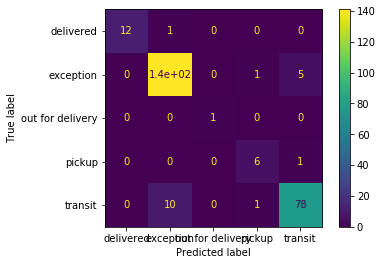

In [299]:
confusion_matrix(Test_Y_4, y_pred_logreg_w2v_4)
from sklearn.metrics import plot_confusion_matrix
plt2 = plot_confusion_matrix(logreg_w2v_4, X_test_word_average_4, Test_Y_4)
 

In [325]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


accuracy_score = accuracy_score(Test_Y_4, y_pred_logreg_w2v_4)
print('accuracy_score = '+ str(accuracy_score))



from sklearn.metrics import classification_report
class_names=['delivered','exception', 'out for delivery', 'pickup', 'transit']
print(classification_report(Test_Y_4, y_pred_logreg_w2v_4, target_names=class_names))

accuracy_score = 0.9260700389105059
                  precision    recall  f1-score   support

       delivered       1.00      0.92      0.96        13
       exception       0.93      0.96      0.94       147
out for delivery       1.00      1.00      1.00         1
          pickup       0.75      0.86      0.80         7
         transit       0.93      0.88      0.90        89

        accuracy                           0.93       257
       macro avg       0.92      0.92      0.92       257
    weighted avg       0.93      0.93      0.93       257



In [278]:
import ktrain
from ktrain import text

In [327]:
import ktrain
from ktrain import text
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500, class_names=['exception', 'out for delivery', 'transit', 'pickup', 'delivered'])

